In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# 2️ Load the CWurData.csv file from your path
df = pd.read_csv(r"C:\Users\richa\Documents\cwurData.csv")

In [3]:
# 3️ Quick look at the data
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2200, 14)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [6]:
# 4️ Data types and missing values
print("\nData Types:")
print(df.dtypes)


Data Types:
world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object


In [7]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64


In [8]:
# 5️ Clean / standardize column names
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]


In [10]:
# Convert numeric columns to correct types
numeric_cols = ['world_rank', 'quality_of_education', 'alumni_employment',
                'quality_of_faculty', 'publications', 'influence', 
                'citations', 'broad_impact', 'patents', 'score']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
# 6️ Basic descriptive statistics
print("\nDescriptive statistics for numeric columns:")
print(df[numeric_cols].describe())


Descriptive statistics for numeric columns:
        world_rank  quality_of_education  alumni_employment  \
count  2200.000000           2200.000000        2200.000000   
mean    459.590909            275.100455         357.116818   
std     304.320363            121.935100         186.779252   
min       1.000000              1.000000           1.000000   
25%     175.750000            175.750000         175.750000   
50%     450.500000            355.000000         450.500000   
75%     725.250000            367.000000         478.000000   
max    1000.000000            367.000000         567.000000   

       quality_of_faculty  publications    influence    citations  \
count         2200.000000   2200.000000  2200.000000  2200.000000   
mean           178.888182    459.908636   459.797727   413.417273   
std             64.050885    303.760352   303.331822   264.366549   
min              1.000000      1.000000     1.000000     1.000000   
25%            175.750000    175.750000   

In [12]:
# 7️ Check unique values for categorical columns
categorical_cols = ['institution', 'country']
for col in categorical_cols:
    print(f"\nNumber of unique values in {col}: {df[col].nunique()}")


Number of unique values in institution: 1024

Number of unique values in country: 59


C:\Users\richa\AppData\Local\Temp\ipykernel_20908\1789936682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='score', y='institution', palette='viridis')


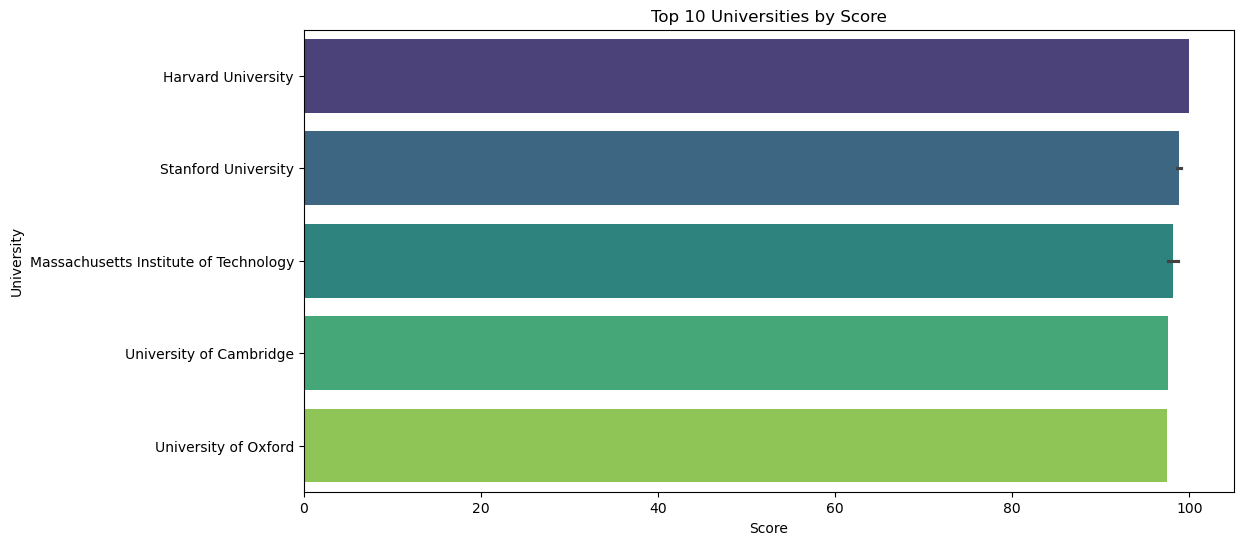

In [13]:
# Top 10 universities by score
top10 = df.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='score', y='institution', palette='viridis')
plt.title("Top 10 Universities by Score")
plt.xlabel("Score")
plt.ylabel("University")
plt.show()

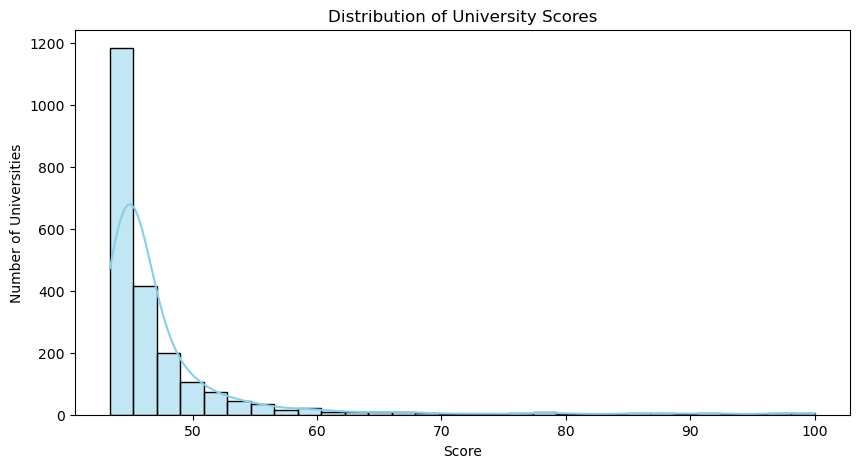

In [14]:
# Distribution of scores
plt.figure(figsize=(10,5))
sns.histplot(df['score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of University Scores")
plt.xlabel("Score")
plt.ylabel("Number of Universities")
plt.show()

C:\Users\richa\AppData\Local\Temp\ipykernel_20908\3658697457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


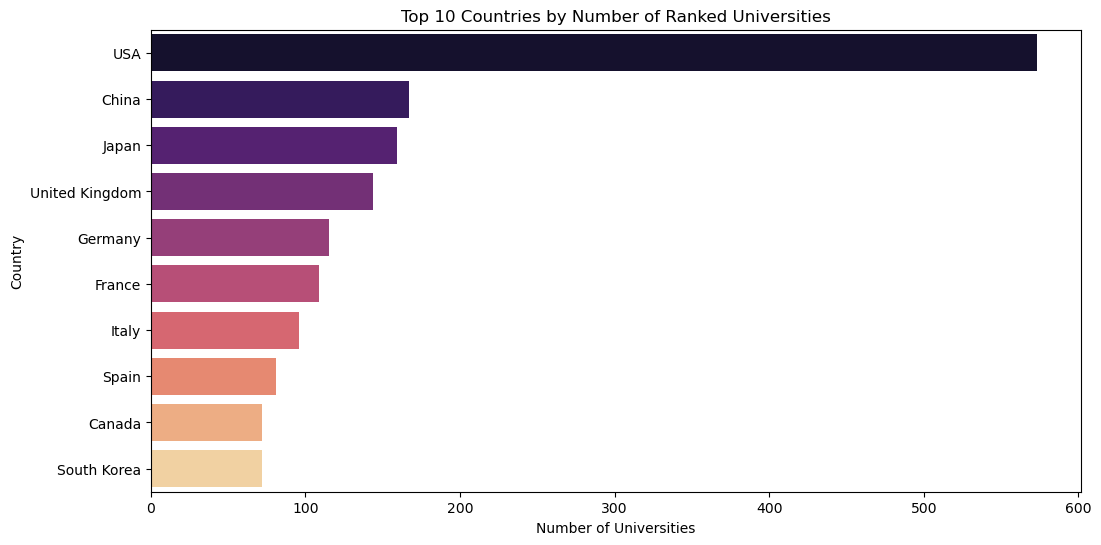

In [15]:
# Count of universities by country (top 10)
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries by Number of Ranked Universities")
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.show()


In [16]:
# 9️ Save cleaned dataset
df.to_csv(r"C:\Users\richa\Documents\CWurData_cleaned.csv", index=False)